# Graph Mining - Week 1 - Graphs and their properties

In [18]:
import networkx as nx
import matplotlib.pyplot as plt


## Introduction to graphs

The graphs are mathematical structures used to model relations between things (objects, thoughts, etc. ) and are composed of two main elements:

### Nodes (or vertices)

The nodes are the elements of the graph and can represent anything. Think you have a travel from Rio de Janeiro to New York. And you will have the following path to get there: Rio de Janeiro -> São Paulo -> New York. In this case, the nodes would be the cities of Rio de Janeiro, São Paulo, and New York.

### Edges (or links)

The edges are the connections between Nodes. In the example above, the edges would be the roads that connect the cities. The edges can have a direction (for Digraphs, directed graphs) or not (for Undirected graphs, simple Graphs). It can have weights (for weighted graphs) or not (for unweighted graphs). This aspects looks like simple, but they can change everything about to find the right solution for a problem.

### Types of Graphs:

- **Simple Graphs**: Graphs that have no loops or multiple edges between the same pair of nodes.
- **Multigraphs**: Graphs that have multiple edges between the same pair of nodes. For example a route of airports that have multiple flights between them, the flights to an Airport 'A' can came from Airport 'B' and Airport 'C', you can came from 'A' to 'B' and 'A' to 'C'. Visual Example bellow:



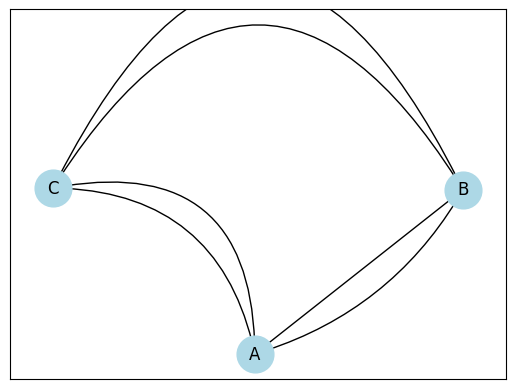

In [19]:
multigraph_airports = {
    'nodes': ['A', 'B', 'C'],
    'edges': [
        ('A', 'B'), 
        ('B', 'A'), 
        ('A', 'C'),
        ('C', 'A'),
        ('B', 'C'),
        ('C', 'B'),
    ]
}

G = nx.MultiGraph()

G.add_nodes_from(multigraph_airports['nodes'])
G.add_edges_from(multigraph_airports['edges'])

# add a curve and spaces between edges

pos = nx.spring_layout(G)

# Desenha os nós
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700)

# Desenha os rótulos dos nós
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

# Ajusta as posições das arestas para que não se sobreponham
# Para cada aresta, desloca ligeiramente a posição
for i, (u, v, data) in enumerate(G.edges(data=True)):
    # Offset slightly by adjusting the connectionstyle
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)],
                           # Ajuste o raio para espaçar as arestas
                           connectionstyle=f'arc3,rad={0.2 * i}',
                           edge_color='black')

# Exibe o gráfico
plt.show()

-**Directed Graphs (Digraphs)**: Graphs that have directed edges. For example, you have a business network where the edges represents the flow of money between companies. In this case, the direction of the edge is important to know who is paying and who is receiveing the money. Visual Example bellow:

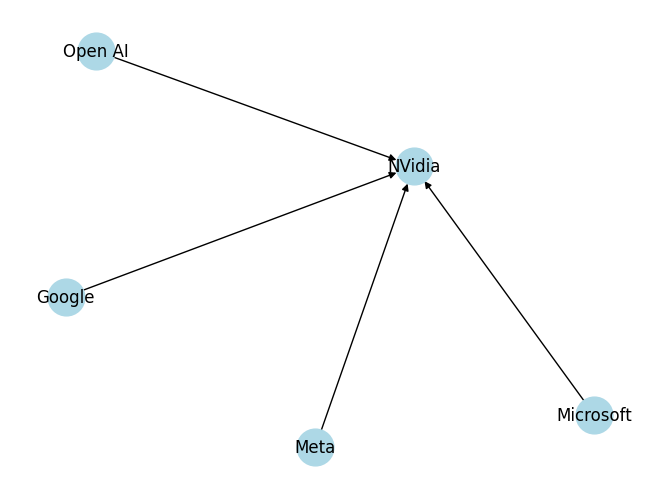

In [20]:
money_flow_digraph = {
    'nodes': ['NVidia', 'Open AI', 'Google', 'Meta', 'Microsoft'],
    'edges': [
        ('Open AI', 'NVidia'),
        ('Google', 'NVidia'),
        ('Meta', 'NVidia'),
        ('Microsoft', 'NVidia'),
    ]
}

G = nx.DiGraph()

G.add_nodes_from(money_flow_digraph['nodes'])
G.add_edges_from(money_flow_digraph['edges'])

pos = nx.spring_layout(G)
nx.draw(
    G, 
    pos, 
    with_labels=True, 
    node_size=700, 
    node_color='lightblue', 
    font_size=12, 
    font_color='black'
)

-**Weighted Graphs**: Graphs that have weights on the edges. For example you have truck route between Seattle and San Francisco, and you will set the distance between the cities as the weight of the edge. Visual Example bellow:

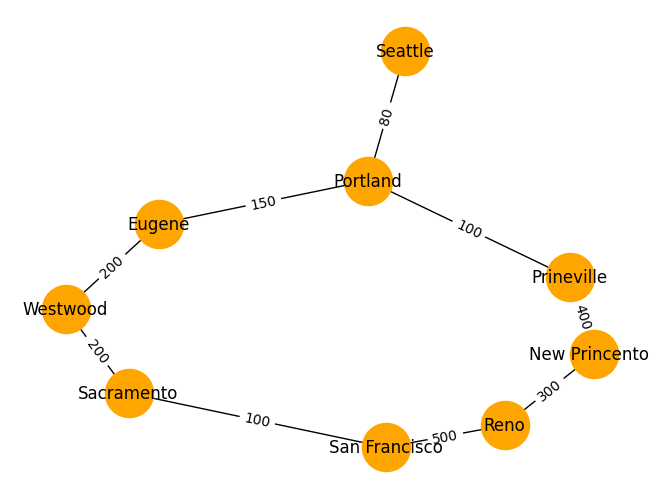

In [21]:
weight_travel_graph = {
    'nodes': [
        'San Francisco', 'Sacramento', 'Westwood', 'Eugene', 'Portland', 'Seattle',
        'Reno', 'New Princenton', 'Prineville'
    ],
    'edges': [
        ('San Francisco', 'Sacramento', 100),
        ('Sacramento', 'Westwood', 200),
        ('Westwood', 'Eugene', 200),
        ('Eugene', 'Portland', 150),
        ('Portland', 'Seattle', 80),
        #path 2
        ('San Francisco', 'Reno', 500),
        ('Reno', 'New Princenton', 300),
        ('New Princenton', 'Prineville', 400),
        ('Prineville', 'Portland', 100),
    ]
}


G = nx.Graph()

G.add_nodes_from(weight_travel_graph['nodes'])
G.add_weighted_edges_from(weight_travel_graph['edges'])

pos = nx.spring_layout(G)

nx.draw(
    G, 
    pos, 
    with_labels=True, 
    node_size=1200, 
    node_color='orange', 
    font_size=12, 
    font_color='black'
)

labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

None

-**Completed Graphs**: Graphs that have an edge between every pair of nodes. Visual Example bellow:

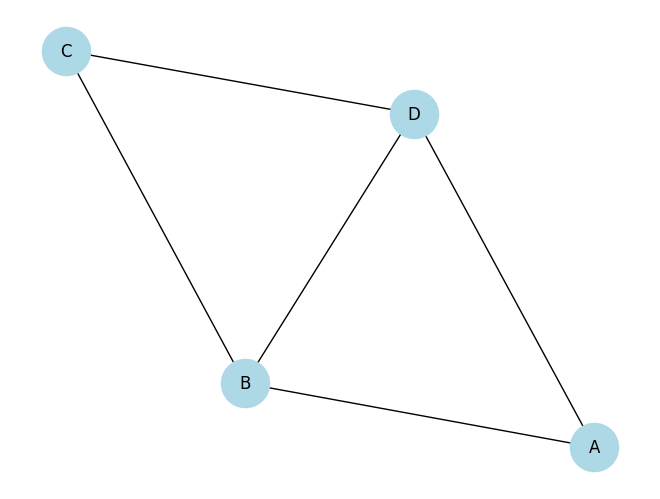

In [22]:
completed_graph = {
    'nodes': ['A', 'B', 'C', 'D'],
    'edges': [
        ('A', 'B'),
        ('B', 'C'),
        ('C', 'D'),
        ('D', 'A'),
        ('D', 'B'),
        ('A', 'C'),
    ]
}

G = nx.Graph()

G.add_nodes_from(completed_graph['nodes'])
G.add_edges_from(completed_graph['edges'])

pos = nx.spring_layout(G)

nx.draw(
    G, 
    pos, 
    with_labels=True, 
    node_size=1200, 
    node_color='lightblue', 
    font_size=12, 
    font_color='black'
)

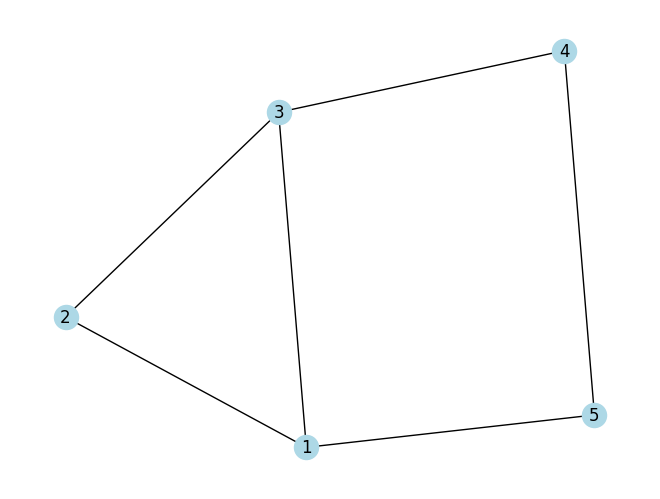

In [23]:
simple_graph = nx.Graph()
simple_graph.add_nodes_from([1, 2, 3, 4, 5])
simple_graph.add_edges_from([
    (1, 2),
    (1, 3),
    (2, 3),
    (3, 4),
    (4, 5),
    (5, 1)
])

nx.draw(
    simple_graph, 
    with_labels=True,
    node_color='lightblue',
)

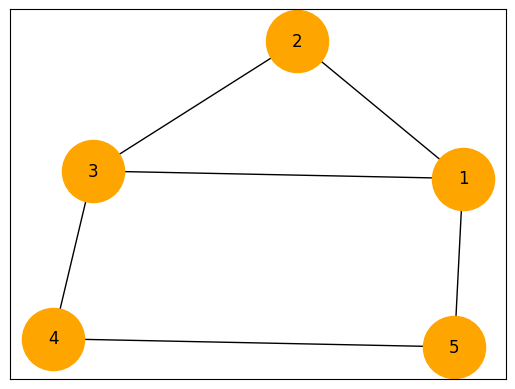

In [24]:
nx.draw_networkx(
    simple_graph,
    with_labels=True,
    node_color='orange',
    node_size=2000
)

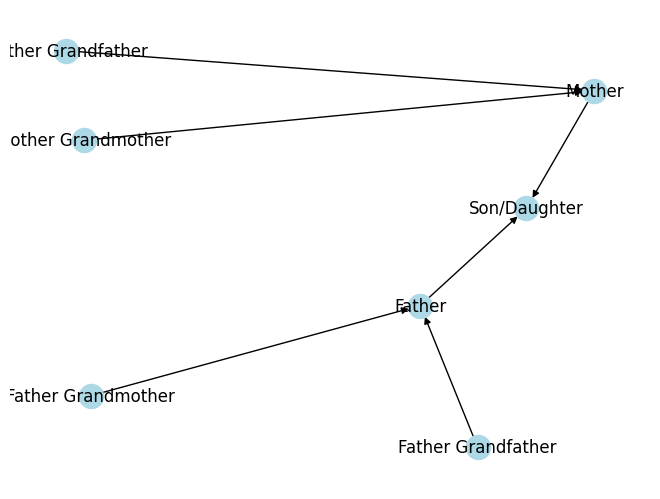

In [25]:
familly_nodes = [
    'Father Grandfather', 
    'Father Grandmother', 
    'Mother Grandfather',
    'Mother Grandmother',
    'Father', 'Mother', 
    'Son/Daughter'
]
familly_edges = [
    ('Father Grandfather', 'Father'),
    ('Father Grandmother', 'Father'),
    ('Mother Grandfather', 'Mother'),
    ('Mother Grandmother', 'Mother'),
    ('Father', 'Son/Daughter'),
    ('Mother', 'Son/Daughter'),
]

simple_digraph = nx.DiGraph()
simple_digraph.add_nodes_from(familly_nodes)
simple_digraph.add_edges_from(familly_edges)

nx.draw(
    simple_digraph, 
    with_labels=True,
    node_color='lightblue',
)

### How to remove an node?

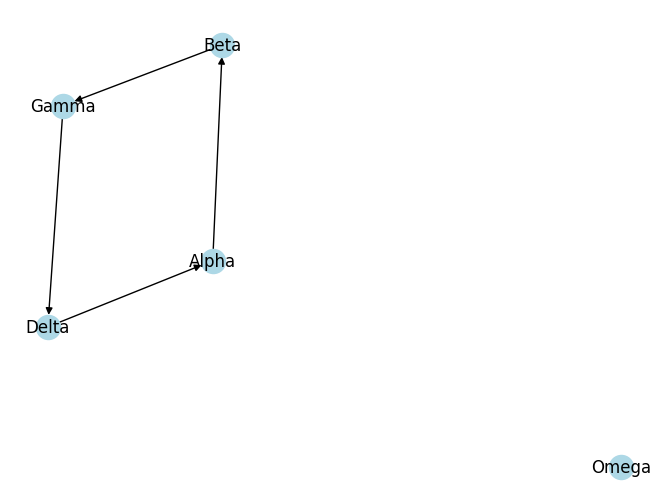

In [26]:
nodes = ['Alpha', 'Beta', 'Gamma', 'Delta', 'Omega']
edges = [
    ('Alpha', 'Beta'),
    ('Beta', 'Gamma'),
    ('Gamma', 'Delta'),
    ('Delta', 'Alpha')
]

simple_digraph = nx.DiGraph()
simple_digraph.add_nodes_from(nodes)
simple_digraph.add_edges_from(edges)

nx.draw(
    simple_digraph, 
    with_labels=True,
    node_color='lightblue',
)

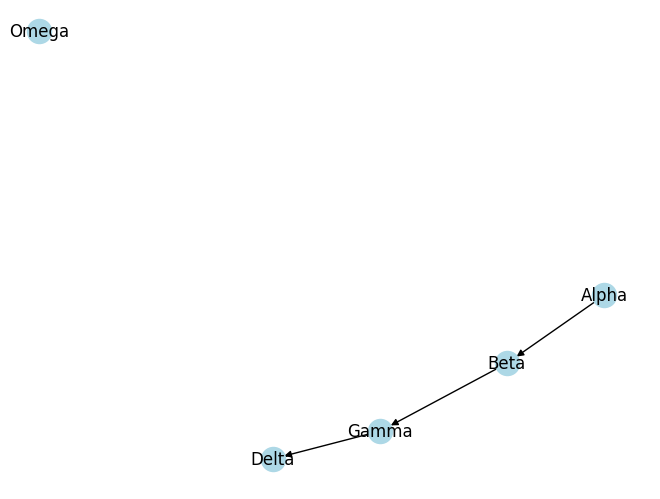

In [27]:
simple_digraph.remove_edge('Delta', 'Alpha')
nx.draw(
    simple_digraph, 
    with_labels=True,
    node_color='lightblue',
)

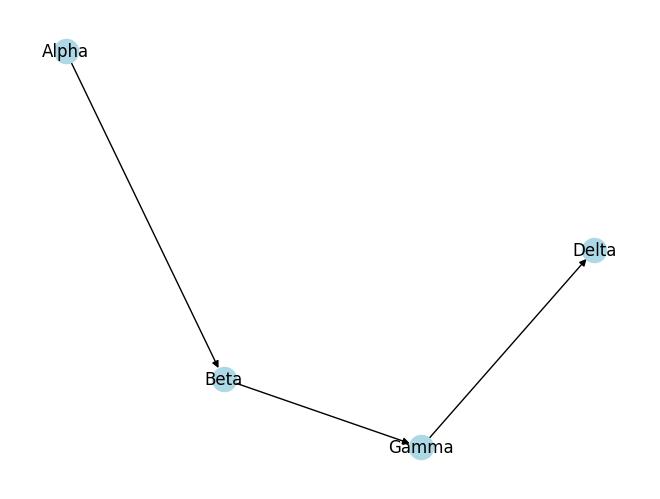

In [28]:
simple_digraph.remove_node('Omega')

nx.draw(
    simple_digraph, 
    with_labels=True,
    node_color='lightblue',
)

### What is a node degree?

In [29]:
simple_digraph.degree()

DiDegreeView({'Alpha': 1, 'Beta': 2, 'Gamma': 2, 'Delta': 1})

### Most common operations:

In [30]:
has_alpha = simple_digraph.has_node('Alpha')
has_omega = simple_digraph.has_node('Omega')

# has paralel edges
simple_digraph.is_multigraph()

# is directed
simple_digraph.is_directed()

# get neighborhoods
simple_digraph.neighbors('Alpha')

### Persistence - Save data to read later

In [31]:
nx.write_adjlist(simple_digraph, 'simple_digraph.adjlist')
simple_digraph = nx.read_adjlist('simple_digraph.adjlist')

### Weighted graph:

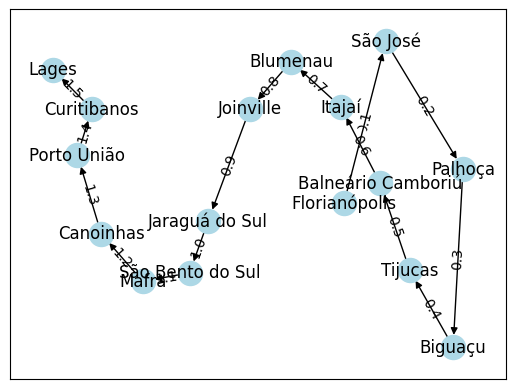

In [32]:
santa_catarina_cities = [
    'Florianópolis', 'São José', 'Palhoça', 
    'Biguaçu', 'Tijucas', 'Balneário Camboriú', 'Itajaí', 
    'Blumenau', 'Joinville', 'Jaraguá do Sul', 'São Bento do Sul', 
    'Mafra', 'Canoinhas', 'Porto União', 'Curitibanos', 'Lages'
]
santa_catarina_roads_between_cities = [
    ('Florianópolis', 'São José', 0.1),
    ('São José', 'Palhoça', 0.2),
    ('Palhoça', 'Biguaçu', 0.3),
    ('Biguaçu', 'Tijucas', 0.4),
    ('Tijucas', 'Balneário Camboriú', 0.5),
    ('Balneário Camboriú', 'Itajaí', 0.6),
    ('Itajaí', 'Blumenau', 0.7),
    ('Blumenau', 'Joinville', 0.8),
    ('Joinville', 'Jaraguá do Sul', 0.9),
    ('Jaraguá do Sul', 'São Bento do Sul', 1.0),
    ('São Bento do Sul', 'Mafra', 1.1),
    ('Mafra', 'Canoinhas', 1.2),
    ('Canoinhas', 'Porto União', 1.3),
    ('Porto União', 'Curitibanos', 1.4),
    ('Curitibanos', 'Lages', 1.5),
]

santa_catarina_graph = nx.DiGraph()
santa_catarina_graph.add_nodes_from(santa_catarina_cities)
santa_catarina_graph.add_weighted_edges_from(santa_catarina_roads_between_cities)

weight_labels = nx.get_edge_attributes(santa_catarina_graph, 'weight')
position = nx.spring_layout(santa_catarina_graph)
nx.draw_networkx_edge_labels(
    santa_catarina_graph,
    pos=position,
    edge_labels=weight_labels
)
nx.draw_networkx(
    santa_catarina_graph, 
    with_labels=True,
    node_color='lightblue',
    pos=position
)

{('Father', 'Son'): Text(0.4945674959542252, -0.13115295994654674, '1'),
 ('Father', 'Daughter'): Text(-0.5050891501014099, 0.0790892757442474, '1'),
 ('Father',
  'Mother'): Text(0.0003311969199120135, 0.0010706431078942868, '0.5'),
 ('Mother', 'Son'): Text(0.5050970859908253, -0.07909139879735011, '1'),
 ('Mother', 'Daughter'): Text(-0.49457552649376835, 0.1311542529811306, '1')}

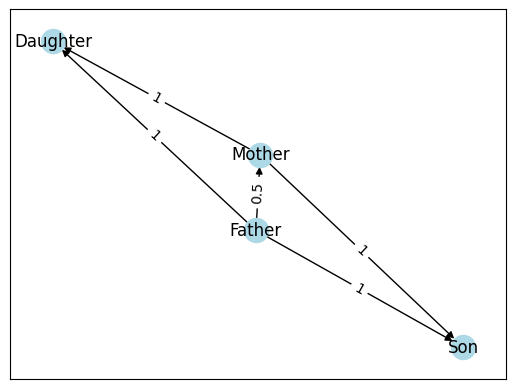

In [33]:
family_relathions = [
    ('Father', 'Son', 1),
    ('Father', 'Daughter', 1),
    ('Mother', 'Son', 1),
    ('Mother', 'Daughter', 1),
    ('Father', 'Mother', 0.5),
]
family = [
    'Father', 'Mother', 'Son', 'Daughter'
]

family_graph = nx.DiGraph()
family_graph.add_nodes_from(family)
family_graph.add_weighted_edges_from(family_relathions)

# print with weights
pos = nx.spring_layout(family_graph)
weight_labels = nx.get_edge_attributes(family_graph, 'weight')
nx.draw_networkx(
    family_graph, 
    with_labels=True,
    node_color='lightblue',
    pos=pos
)
nx.draw_networkx_edge_labels(
    family_graph,
    pos=pos,
    edge_labels=weight_labels
)

## Network Models

### Regular model

The regular model is a model where all nodes have the same degree. This model cannot describe the majority of the real-world networks, but it is a good starting point to understand the properties of the networks.

### Erdos-Renyi random model

In 1959, Renyi and Erdos proposed a random model to generate graphs. In this model, the probability of having an edge between two nodes is the same for all pairs of nodes. This model is useful to understand the properties of random graphs.


### Small world model (Watts-Strogatz model)

